# Notebook to Load Data and Perform Dimensionality Reduction using PCA

## Imports

In [1]:
# imports
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

print('Done imports!')

Done imports!


## Load Data

In [2]:
# create column header names
inp_names = list(range(60))
names = inp_names + ['Rock_or_Mine']

# read in data
df = pd.read_csv('sonar.all-data', names=names)

# change target to binary
df['Rock_or_Mine'] = pd.get_dummies(df.Rock_or_Mine)['M']

# show
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Rock_or_Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


## Perform Principle Component Analysis

In [3]:
# choose number of components to keep
nc = 5

# select input and target columns
X_tr = df[inp_names].to_numpy()
Y_tr = df['Rock_or_Mine'].to_numpy()

# split into training and validation sets
# X_tr,X_va,Y_tr,Y_va = train_test_split(X,Y ,test_size=0.25)

# inititate PCA
pca=PCA(n_components=nc)

# fit PCA
pca.fit(X_tr)

# transform data
X_tr_pca = pca.transform(X_tr)
# X_va_pca = pca.transform(X_va)

print('Done PCA!')

Done PCA!


In [4]:
# do reconstruction
X_tr_recon = pca.inverse_transform(X_tr_pca)

## Plot Original vs Reconstruction Data

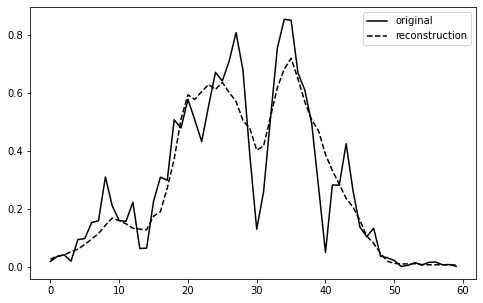

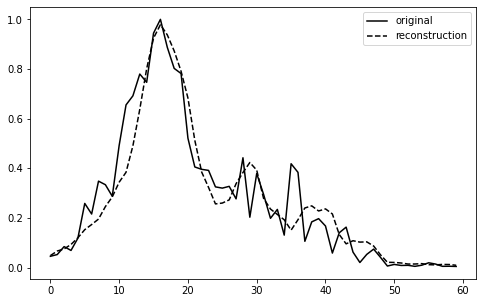

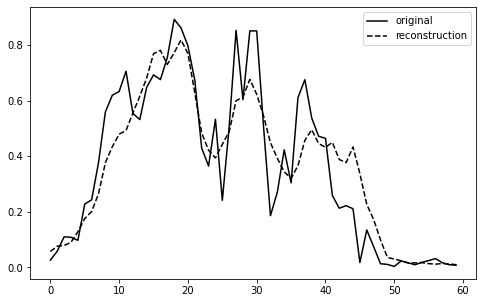

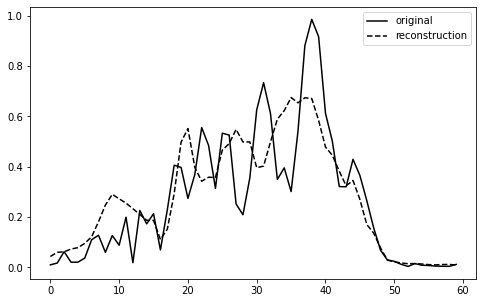

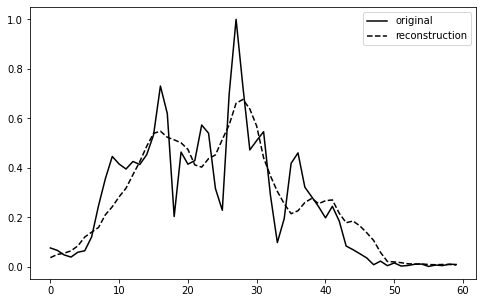

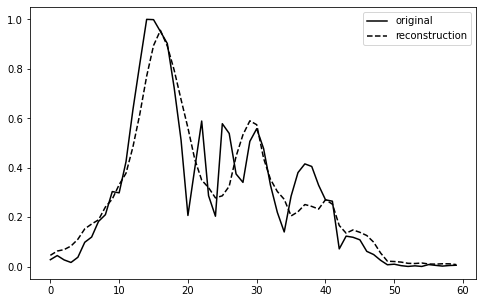

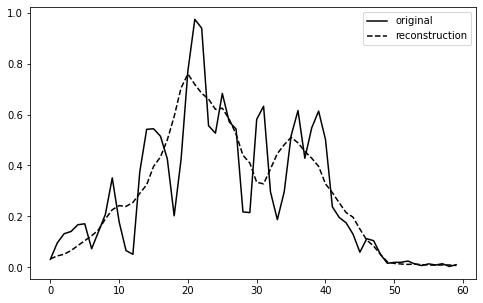

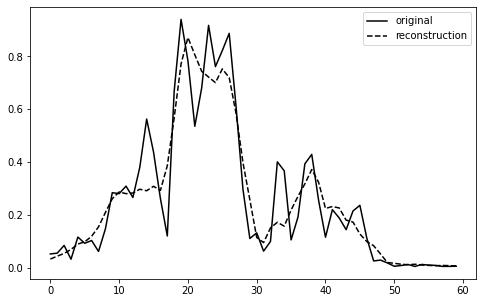

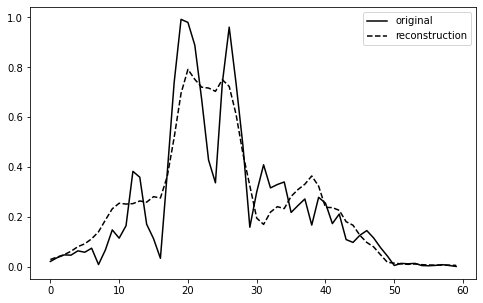

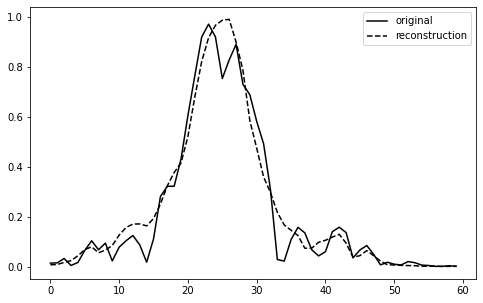

In [5]:
for i in range(10):
    plt.figure(figsize=(8,5))
    plt.plot(X_tr[i], label='original', color='black')
    plt.plot(X_tr_recon[i], label='reconstruction', color='black', linestyle='--')
    plt.legend()